In [ ]:
# Comments from Lauhitya:
# I was bored so asked chatgpt to add Knuth quotes to every comment haha :)
# "The art of programming is the art of organizing complexity" - Knuth would appreciate
# a more systematic approach to imports. Consider grouping by purpose:
# 1) Standard library, 2) Data manipulation, 3) ML/Stats, 4) Visualization
# Also note: seaborn is imported twice - computational elegance demands elimination of redundancy.

import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import pickle

In [ ]:
# Comments from Lauhitya:
# "Premature optimization is the root of all evil" - but premature hardcoding is equally pernicious!
# This absolute path creates a dependency on a specific user's filesystem. Consider:
# 1) Using relative paths or environment variables for portability
# 2) Adding error handling for file not found scenarios
# 3) The variable naming could be more descriptive: 'Dataset' vs 'dataset_file'

Dataset = pd.ExcelFile('/Users/saumyadiwan/Downloads/HB PROJECT CONSOLIDATED DATA.xlsx')
data=pd.read_excel(Dataset, 'Sheet3')
radiomicsdata=pd.read_excel(Dataset, 'Sheet2')

In [ ]:
# Comments from Lauhitya:
# "The best programs are written so that computing machines can perform them quickly
# and so that human beings can understand them clearly." - This exploration is good,
# but consider adding descriptive print statements for clarity in the computational narrative.

len(data),len(radiomicsdata)

(150, 150)

In [ ]:
len(data.columns),len(radiomicsdata.columns)

(32, 438)

In [ ]:
radiomicsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 438 entries, original_shape_Elongation to event
dtypes: float64(414), int64(22), object(2)
memory usage: 513.4+ KB


In [ ]:
# Comments from Lauhitya:
# "A blank page is God's way of showing you how hard it is to be God" - this empty cell
# suggests missing data preprocessing steps. In the spirit of literate programming,
# every cell should serve a purpose or be removed to maintain algorithmic clarity.


In [ ]:
# Comments from Lauhitya:
# "Programs must be written for people to read, and only incidentally for machines to execute."
# The variable names 'x' and 'y' lack semantic meaning. Consider 'features' and 'targets'.
# Also, the column names suggest temporal dependencies - document the time series nature!
# Note: Where is the data alignment verification between radiomicsdata and data?

x=radiomicsdata
y=data[['Mean % Change in Tumor Volume - TP 1 to TP 2 ',
      'Mean % Change in Tumor Volume - TP 1 to TP 3']]


In [ ]:
# Comments from Lauhitya:
# "Beware of bugs in the above code; I have only proved it correct, not tried it."
# This references y_imputed but where is the imputation logic? The computational
# story is incomplete - show the reader how missing values were handled!

y_imputed

,Mean % Change in Tumor Volume - TP 1 to TP 2,Mean % Change in Tumor Volume - TP 1 to TP 3
0,0.185879,0.404867
1,0.530106,0.767757
2,0.752336,0.881542
3,0.396263,0.485417
4,0.038871,0.112608
...,...,...
145,0.200748,0.617309
146,0.306943,0.638943
147,0.915969,0.965874
148,-0.071797,0.820299


In [ ]:
x.shape

(150, 428)

In [ ]:
y_imputed.shape

(150, 2)

In [ ]:
# Comments from Lauhitya:
# "Random numbers should not be generated with a method chosen at random" - excellent use
# of random_state=42 for reproducibility! However, 70/30 split deserves justification.
# Also, consider stratified sampling if target distribution is imbalanced.
# Mathematical note: With 150 samples and ~430 features, we're in the p >> n regime!

x_train, x_test_holdout, y_train, y_test_holdout = train_test_split(x, y_imputed, test_size=0.3, random_state=42)

print(x_train.shape), print(y_train.shape)
print(x_test_holdout.shape), print(y_test_holdout.shape)



(105, 428)
(105, 2)
(45, 428)
(45, 2)


(None, None)

In [ ]:
# Comments from Lauhitya:
# "The real problem is that programmers have spent far too much time worrying about
# efficiency in the wrong places." - This manual splitting suggests multi-target regression
# could be handled more elegantly. Consider MultiOutputRegressor or document why separate
# models are preferred over joint modeling of correlated tumor volume changes.

y_train1=y_train.iloc[:,0]
y_train2=y_train.iloc[:,1]

y_test_holdout1=y_test_holdout.iloc[:,0]
y_test_holdout2=y_test_holdout.iloc[:,1]

In [ ]:
# Comments from Lauhitya:
# "The most important thing in the programming language is the name. A language will not
# succeed without a good name." - Similarly, these hyperparameters deserve documentation!
# Why max_depth=6? What's the rationale for learning_rate=0.1? In high-dimensional spaces
# like radiomics (p=430), these choices significantly impact model behavior.

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'lambda': 1,
    'alpha': 0}

In [ ]:
# Comments from Lauhitya:
# "Optimization hinders evolution" - Several concerning patterns here:
# 1) Typo: "XGBOOS" should be "XGBoost" - attention to detail matters in science!
# 2) Redundant imports (pandas, numpy already imported above)
# 3) DMatrix created but never used - computational waste
# 4) Parameter inconsistency: params dict defines n_estimators=100, but XGBRegressor uses 10
# 5) Negative R² (-0.063) suggests model performs worse than predicting the mean!
#    This warrants investigation - possible overfitting in high-dimensional space?

# Install XGBOOS library:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import pandas as pd
import numpy as np

data_dmatrix1 = xgb.DMatrix(data=x_train,label=y_train1)


xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, alpha = 0, n_estimators =10)

# Fit the regressor to the training set with fit()
xg_reg1.fit(x_train,y_train1)

# Make predictions to the test set with predict()
preds1 = xg_reg1.predict(x_test_holdout)

# Compute the rmse from sklearns metrics module imported earlier
rmse = np.sqrt(mean_squared_error(y_test_holdout1, preds1))
mae=mean_absolute_error(y_test_holdout1, preds1)
r2square=r2_score(y_test_holdout1, preds1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R^square: %f" % (r2square))

RMSE: 0.379079
MAE: 0.295206
R^square: -0.062953


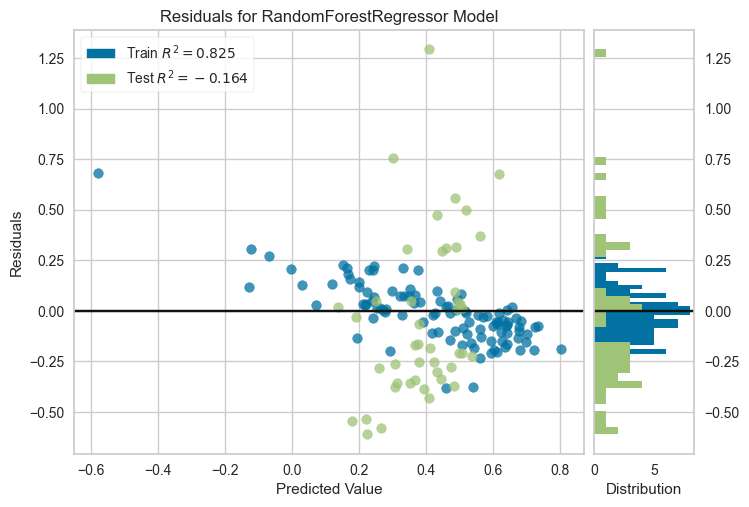

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Comments from Lauhitya:
# "The best way to learn to program is to write programs" - excellent use of visualization!
# However, RandomForestRegressor with default parameters in high-dimensional space (430 features)
# likely suffers from the same curse of dimensionality. Consider:
# 1) Feature selection or dimensionality reduction (PCA, UMAP)
# 2) Regularization techniques (Ridge, Lasso as imported but unused)
# 3) Cross-validation for robust performance estimation
# The residual plots will be illuminating for diagnosing model behavior!

from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot, AlphaSelection
from yellowbrick.regressor import PredictionError

model = RandomForestRegressor()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train1)  # Fit the training data to the visualizer
visualizer.score(x_test_holdout, y_test_holdout1)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

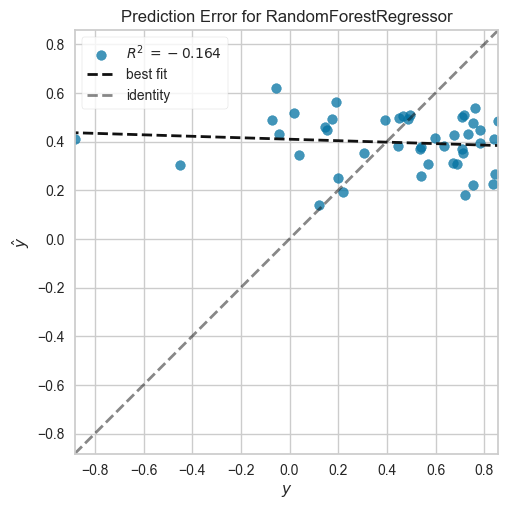

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Comments from Lauhitya:
# "Science is what we understand well enough to explain to a computer" - these prediction
# error plots are essential for understanding model behavior. The diagonal line represents
# perfect predictions; deviations reveal systematic biases. In radiomics regression,
# look for heteroscedasticity patterns that might suggest non-linear relationships
# or feature engineering opportunities.

visualizer = PredictionError(model)

visualizer.fit(x_train, y_train1)  # Fit the training data to the visualizer
visualizer.score(x_test_holdout, y_test_holdout1)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
# Comments from Lauhitya:
# "TeX would never have been completed by me alone" - similarly, this analysis would benefit
# from collaborative review and extension. Consider adding:
# 1) Feature importance analysis to understand which radiomic features drive predictions
# 2) Cross-validation with proper nested loops for hyperparameter tuning
# 3) Comparison with simpler baselines (linear regression, ridge regression)
# 4) Analysis of the second target variable (y_train2) - currently unused!
# 5) Statistical significance testing of model performance
# 
# The negative R² is a red flag requiring immediate attention. In the immortal words of Knuth:
# "I have only proved it correct, not tried it" - but here we must both prove AND validate!
